<a href="https://colab.research.google.com/github/omaimaALokap-web/ShAI_BootCamp_Assignment/blob/main/Copy_ofShAI_BootCamp_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [95]:
import pandas as pd
import numpy as np
# read CV file from Desktop
import io
from google.colab import files
import matplotlib.pyplot as plt
# Upload the 'Salaries.csv' file
uploaded = files.upload()


Saving Salaries.csv to Salaries (2).csv


In [96]:
# Get the file name
file_name = next(iter(uploaded))

# Read the uploaded file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

In [97]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task1

In [98]:
# Identify the number of rows and columns
rows = df.shape[0]
columns = df.shape[1]
print("The number of rows:",rows)
print("The number of columns:",columns)

The number of rows: 148654
The number of columns: 13


In [99]:
# Determine the data types of each column
data_types = df.dtypes
print("Data types of each column:", data_types)

Data types of each column: Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [100]:
# check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:",missing_values)

Missing values in each column: Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64



# Task2: Descriptive Statistics
Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [101]:
# This is formatted as code
mean_salary = df['TotalPay'].mean()
print("Mean salary:", mean_salary)

Mean salary: 74768.32197169267


In [102]:
# Calculate the median salary
median_salary = df['TotalPay'].median()
print("Median salary:", median_salary)

Median salary: 71426.60999999999


In [103]:
# Calculate the mode salary
mode_salary = df['TotalPay'].mode()
print("Mode salary:", mode_salary)

Mode salary: 0    0.0
Name: TotalPay, dtype: float64


In [104]:
# Calculate the minimum and maximum salary
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)

Minimum salary: -618.13
Maximum salary: 567595.43


In [105]:
# Calculate the range of salaries
salary_range = max_salary - min_salary
print("Range of salaries:", salary_range)

Range of salaries: 568213.56


In [106]:
# Calculate the standard deviation of salaries
std_dev_salary = df['TotalPay'].std()
print("Standard deviation of salaries:", std_dev_salary)

Standard deviation of salaries: 50517.00527394987


# Task3: Data Cleaning

Handle missing data by suitable method with explain why you use it.

In [107]:
# count the null values in BasePAy
print("BasePay null values:",df['BasePay'].isnull().sum())
# count the null values in OvertimePay
print("OvertimePay null values:",df['OvertimePay'].isnull().sum())
# count the null values in OtherPay
print("OtherPay null values:",df['OtherPay'].isnull().sum())
# count the null values in Benefits
print("Benefits null values:",df['Benefits'].isnull().sum())


BasePay null values: 609
OvertimePay null values: 4
OtherPay null values: 4
Benefits null values: 36163


In [108]:
# filter Ids that have null values in the columns[OtherPay,OvertimePay,Benefits,BasePay]
df[df['OtherPay'].isnull() & df['OvertimePay'].isnull()&df['Benefits'].isnull()&df['BasePay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN


In [109]:
# Delet the columns that are contained on null values in the [OtherPay,OvertimePay,Benefits,BasePay] columns
df.drop(df[df['OtherPay'].isnull() & df['OvertimePay'].isnull()&df['Benefits'].isnull()&df['BasePay'].isnull()].index,inplace=True)

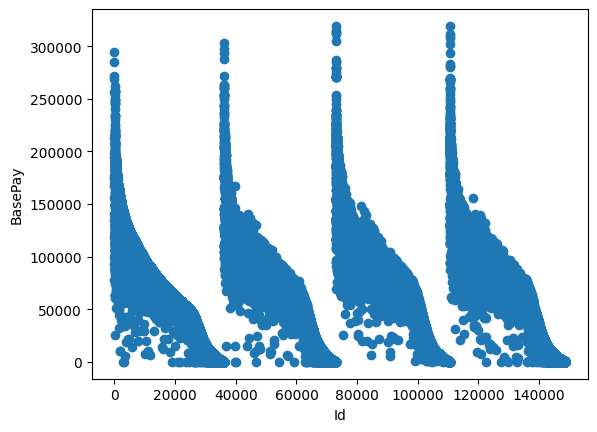

In [110]:
plt.scatter(df['Id'], df['BasePay'])
plt.xlabel('Id')
plt.ylabel('BasePay')
plt.show()

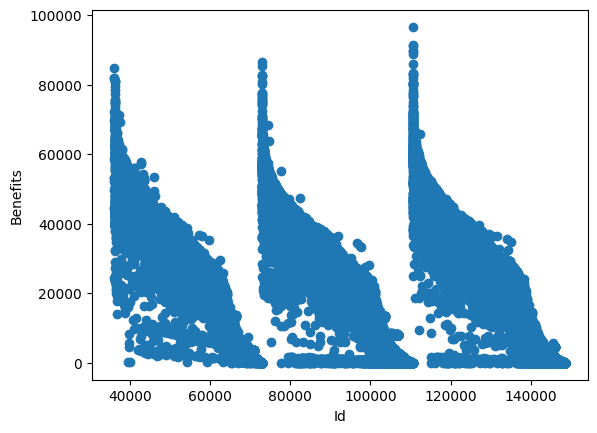

In [111]:
plt.scatter(df['Id'], df['Benefits'])
plt.xlabel('Id')
plt.ylabel('Benefits')
plt.show()

In [116]:
# the distribution for my data is Positively Skewed
# I used median. The median is less sensitive to extreme values and can be a better representation of the typical value in skewed distributions.

df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

In [112]:
# Drop the notes and Status columns, they don't have any value
df = df.drop(['Notes','Status'], axis=1)

In [117]:
# count the null values in BasePAy
print("BasePay null values:",df['BasePay'].isnull().sum())
# count the null values in OvertimePay
print("OvertimePay null values:",df['OvertimePay'].isnull().sum())
# count the null values in OtherPay
print("OtherPay null values:",df['OtherPay'].isnull().sum())
# count the null values in Benefits
print("Benefits null values:",df['Benefits'].isnull().sum())


BasePay null values: 0
OvertimePay null values: 0
OtherPay null values: 0
Benefits null values: 0


# Task4: Basic Data Visualization
Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [118]:
# Extracting the department from the 'JobTitle' column
df['Department'] = df['JobTitle'].str.extract(r'\((.*?)\)')

# Converting the department to lowercase
df['Department'] = df['Department'].str.lower()

# Replacing specific department values with corrected values
df['Department'] = df['Department'].replace({'civil & criminal': 'civil/criminal', 'cvl&crmnl': 'civil/criminal'})

# Reordering the columns in the DataFrame
new_order = ['Id', 'EmployeeName', 'Department', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency']
df = df[new_order]

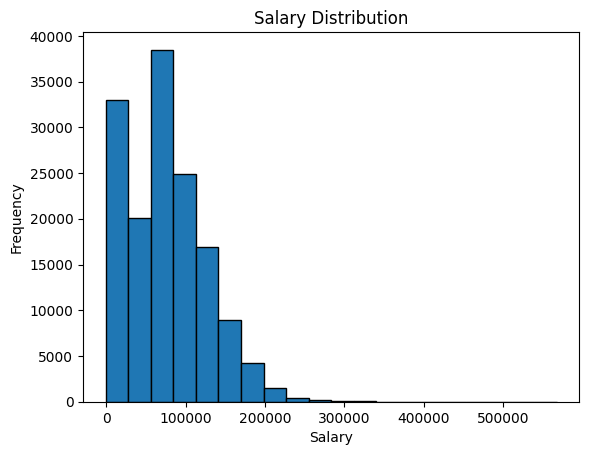

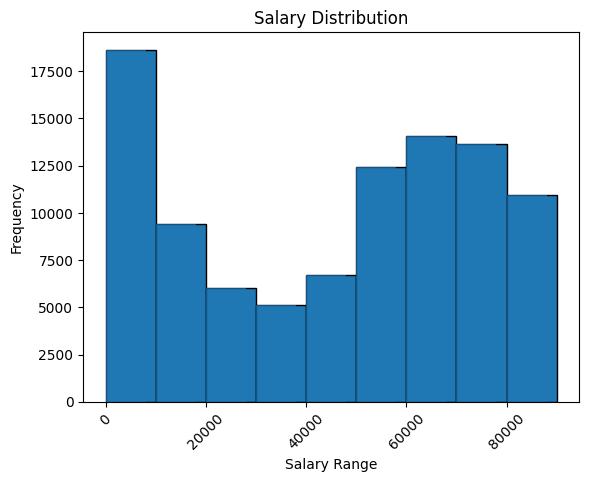

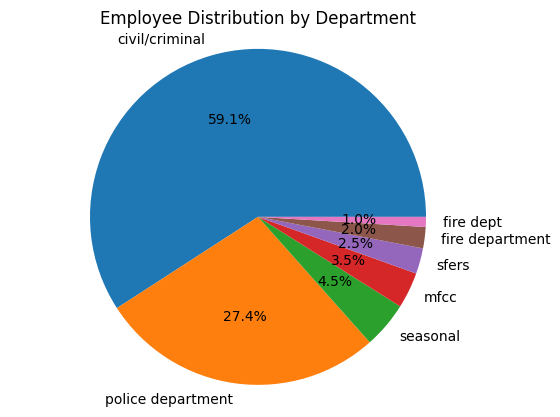

In [119]:
# Generate histogram for salary distribution
plt.hist(df['TotalPay'], bins=20, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

# Generate bar chart for salary distribution
bin_edges = range(0, 100000, 10000)  # Specify the bin edges

bin_counts, _, _ = plt.hist(df['TotalPay'], bins=bin_edges, edgecolor='black')
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.xticks(rotation=45)
plt.bar(bin_edges[:-1], bin_counts, width=8000, align='edge', alpha=0.7)
plt.show()

# Generate pie chart for department distribution
department_counts = df['Department'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Employee Distribution by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Task5 : Grouped Analysis

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups

In [120]:
# Grouping the data by 'Department' and counting the number of 'Id' values
grouped_count = df.groupby('Department')['Id'].count()

# Calculating summary statistics for the 'TotalPay' column
summary_stats = df.groupby('Department')['TotalPay'].agg(['mean', 'median', 'min', 'max'])

# Combining the count and summary statistics into a single DataFrame
summary_stats['Count'] = grouped_count

# Renaming the columns
summary_stats.columns = ['Average Salary', 'Median Salary', 'Minimum Salary', 'Maximum Salary', 'Count']

# Displaying the summary statistics
pd.DataFrame(summary_stats)

,Average Salary,Median Salary,Minimum Salary,Maximum Salary,Count
Department,,,,,
civil/criminal,136806.539283,150254.700,0.00,225366.50,1534
fire department,217652.300000,226357.330,7093.37,326373.19,53
fire dept,276063.426400,284102.450,107699.79,333888.32,25
mfcc,67517.330222,79729.945,1122.70,97413.08,90
police department,158423.671517,152548.170,283.86,538909.28,712
seasonal,9382.643879,8380.800,293.40,20952.00,116
sfers,87697.342344,84263.110,576.36,231739.64,64


# Task6: Simple Correlation Analysis
Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

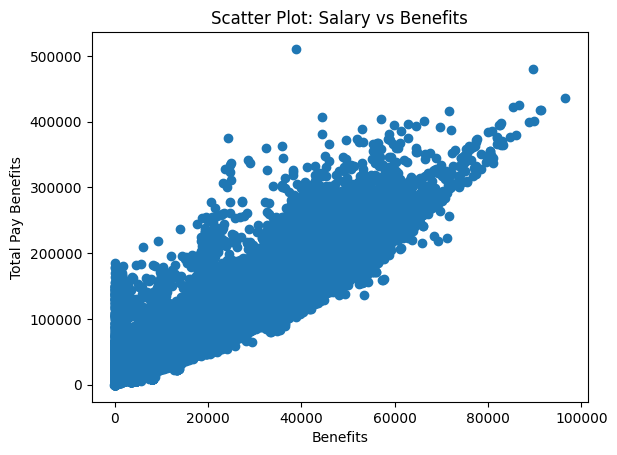

Correlation Coefficient: 0.9301396647939127


In [ ]:
# Calculating the correlation coefficient between TotalPayBenefits and Benefits
correlation_coefficient = df['TotalPayBenefits'].corr(df['Benefits'])
# Creating a scatter plot
plt.scatter(df['Benefits'], df['TotalPayBenefits'])
plt.xlabel('Benefits')
plt.ylabel('Total Pay Benefits')
plt.title('Scatter Plot: Salary vs Benefits')
plt.show()

# Displaying the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

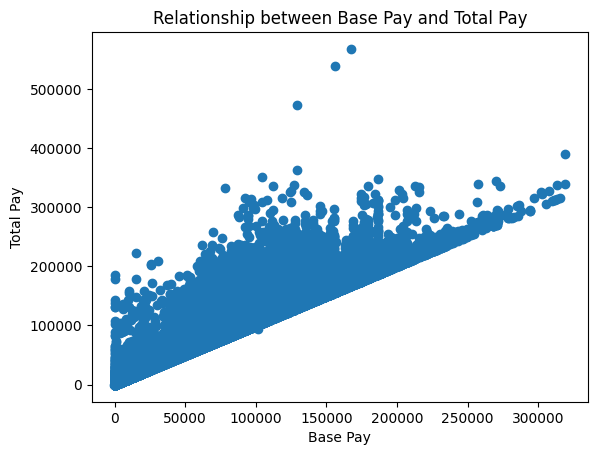

Correlation between TotalPay and BasePay: 0.9544936474296023


In [ ]:
# Calculate the correlation between the TotalPay and BasePay columns
correlation = df['TotalPay'].corr(df['BasePay'])

plt.scatter(df['BasePay'], df['TotalPay'])
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.title('Relationship between Base Pay and Total Pay')
plt.show()

# Print the correlation
print('Correlation between TotalPay and BasePay:', correlation)

# Good Luck!